In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("dark_background")
from scipy import integrate

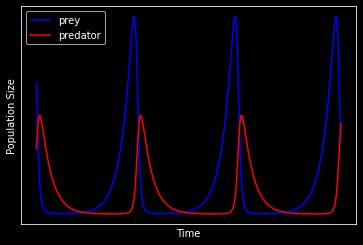

In [3]:
alpha = 1. #mortality rate due to predators
beta = 2.
delta = 1.
gamma = 1.
x0 = 4.
y0 = 2.

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

t = np.linspace(0.,30, 500)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

plt.plot(t,x,color='b')
plt.plot(t,y,color='r')

plt.legend(['prey','predator'])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.xticks([])
plt.yticks([]);
plt.savefig('lotkavolterra.png',transparent=True,dpi=300)

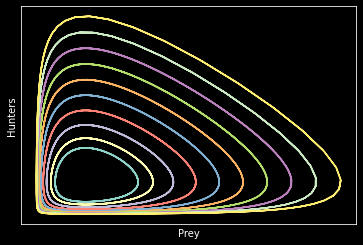

In [4]:
plt.figure()
IC = np.linspace(1.0, 6.0, 21) # initial conditions for deer population (prey)
bo = True
for deer in IC:
    if bo:
        bo=False
        continue
    else:
        bo=True
    X0 = [deer, 1.0]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Prey")
plt.ylabel("Hunters")
plt.xticks([])
plt.yticks([]);
plt.savefig('lotkavolterra2.png',dpi=300,transparent=True)

In [23]:
def Euler(func, X0, t, alpha, beta, delta, gamma):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], alpha,  beta, delta, gamma) * dt
    return X
Xe = Euler(derivative, X0, t, alpha, beta, delta, gamma)